## Principal Component Analysis (PCA) and Hierarchical Clustering Analysis (HCA) with Pandas and SKlearn

This notebook provides a step-by-step guide to performing Principal Component Analysis (PCA) and Hierarchical Clustering Analysis (HCA) using the Pandas and SKlearn libraries in Python. The aim is to provide a practical approach to these two important techniques in data analysis and machine learning.




## Dataset

We will be using the Iris dataset this exercise. You can use any dataset of your choice that is suitable for PCA and HCA. The dataset should be in a format that can be read into a Pandas dataframe using the `read_csv()` function.
For more info on the dataset check out - https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

## Overview

Principal Component Analysis (PCA) and Hierarchical Clustering Analysis (HCA) are two popular unsupervised machine learning techniques used for dimensionality reduction and data exploration.

### Principal Component Analysis (PCA)

PCA is a technique that transforms a set of possibly correlated variables into a smaller set of uncorrelated variables called principal components. These principal components are ordered by decreasing importance, with the first principal component accounting for the most variance in the data. PCA is often used to reduce the dimensionality of data before applying other machine learning techniques, such as classification or regression.

### Hierarchical Clustering Analysis (HCA)

HCA is a technique that groups data points into a hierarchy of clusters based on their similarity. The resulting hierarchy is represented as a dendrogram, which is a tree-like diagram that shows the relationships between the clusters. HCA is often used to identify clusters in data that may not be apparent from the original data.

**Examples of PCA and HCA Applications**

PCA and HCA have a wide range of applications in various domains, including:

* **Data Visualization:** PCA can be used to reduce the dimensionality of data for visualization, making it easier to visualize patterns and relationships in high-dimensional data.

* **Dimensionality Reduction:** PCA can be used to reduce the number of variables in a dataset while preserving as much of the original information as possible. This is useful for preparing data for machine learning algorithms that are sensitive to the number of input features.

* **Feature Extraction:** PCA can be used to extract new features from a dataset that represent the underlying structure of the data. These new features may be more informative for machine learning tasks than the original features.

* **Clustering:** HCA can be used to identify clusters of data points that are similar to each other. This can be useful for tasks such as customer segmentation and product recommendation.

* **Anomaly Detection:** HCA can be used to identify data points that are outliers or anomalies. This can be useful for tasks such as fraud detection and system monitoring.

By understanding the principles and applications of PCA and HCA, you can effectively apply these techniques to extract meaningful insights from your data and enhance your machine learning pipelines.

## PCA

### Task 1: Importing the Dataset

The first step in any data analysis task is to import the data. Pandas provides various functions to read different types of data. In this case, we will use the read_csv() function to read our dataset into a Pandas dataframe.

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn import datasets
# Task 1: Load the dataset
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()
# to use import download the csv file and use the following code:
# df = pd.read_csv('iris.csv')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Task 2: Exploring the Dataset
Before applying PCA and HCA, it’s a good idea to explore the dataset. This can be done using various functions provided by Pandas and Matplotlib. For instance, you can use the boxplot() method from Pandas, and imshow() and hist() functions from Matplotlib to visualize the data.

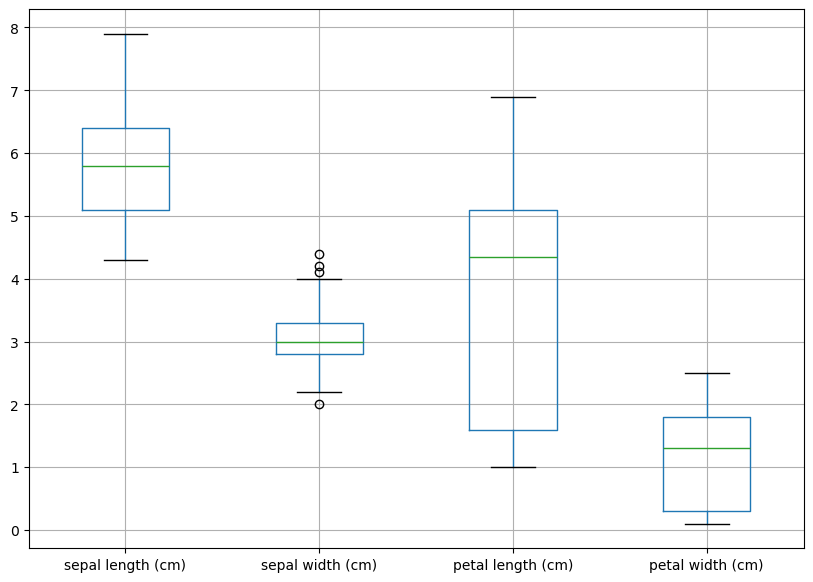

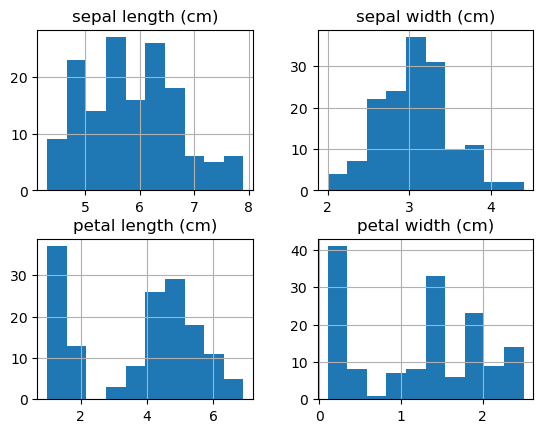

In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Task 2: Explore the dataset
new_data = df[["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]]

plt.figure(figsize = (10, 7)) 
df.boxplot() 

df.hist()
plt.show()


In [3]:
# Removing Outliers 
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3 = col. quantile( [0.25, 0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5 * IQR)
    upper_range = Q3+(1.5 * IQR)
    return lower_range, upper_range

In [5]:
#Cap & floor the values beyond the outlier boundaries 
import numpy as np
feature_list = df.columns
for i in feature_list:
    LL, UL = remove_outlier(df[i])
    df[i] = np.where(df[i] > UL, UL, df[i])
    df[i] = np.where(df[i] < LL, LL, df[i])

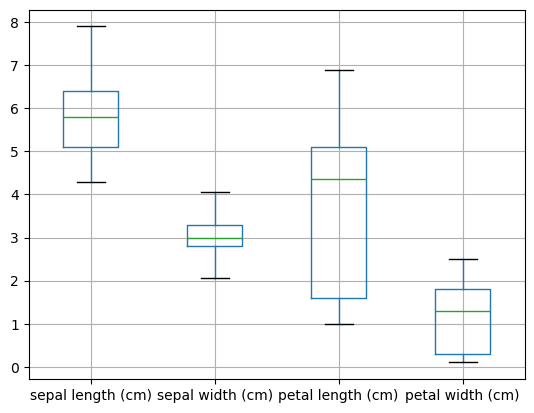

In [6]:
# check after removing outliers
df.boxplot()
plt.show()

In [7]:
# as you can see outliers are removed

### Task 2b: Extracting Specific Columns
In preparation for later tasks, we need to extract specific columns from the dataframe. This can be done using the indexing operator [] or the loc and iloc functions provided by Pandas.

In [9]:
# Task 2b: Extract specific columns
df_subset = df[["sepal length (cm)","sepal width (cm)"]]
df_subset

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


### Task 3: Performing PCA
PCA is a technique used to reduce the dimensionality of datasets, increasing interpretability while minimizing information loss. It does so by creating new uncorrelated variables that successively maximize variance.

In [11]:
from sklearn.decomposition import PCA
# Task 3: Perform PCA
pca = PCA(n_components=4)
reduced_data_pca = pca.fit_transform(df)

### Task 4: Visualizing the Results of PCA
After performing PCA, it’s often useful to visualize the results. This can be done by creating a scatter plot of the first two principal components.

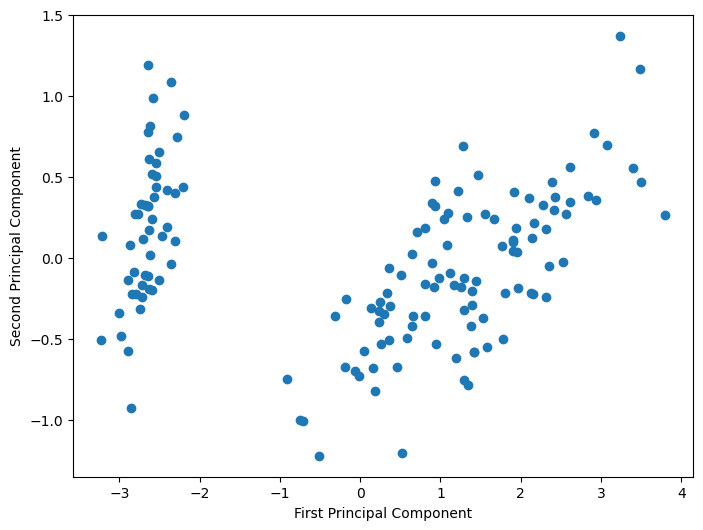

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(reduced_data_pca[:,0], reduced_data_pca[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

## HCA

### Task 1: Performing HCA
HCA is another technique for reducing dimensionality. It’s an unsupervised learning algorithm that clusters similar data points together.

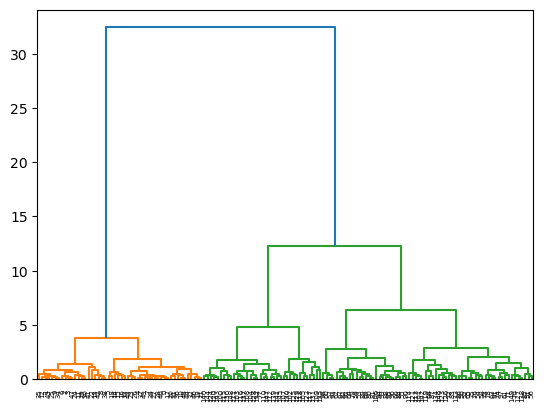

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Task 5: Perform HCA
Z = linkage(df, 'ward')
dendrogram(Z)
plt.show()

### Task 2: Performing HCA on a Subset of the Data
To gain insights into how a subset of the data might cluster, create a new version of the dataset containing only a select number of features. For this exercise, simply use the first 100 features in the dataset. This will allow us to observe any potential patterns or clusters that may emerge from this subset of data. Remember, the dataset you choose can be any dataset that is suitable for hierarchical clustering analysis.

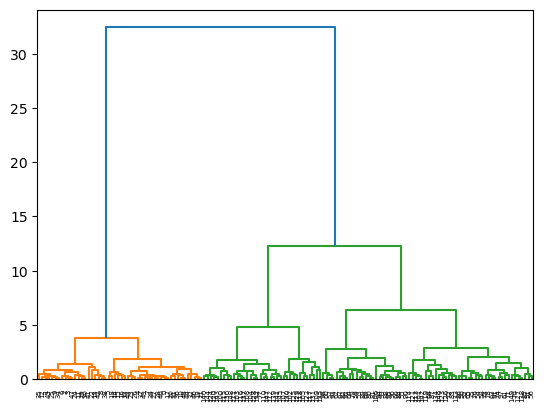

In [14]:
# Task 6: Perform HCA on a subset of the data
df_subset = df.iloc[:, :100]
Z_subset = linkage(df_subset, 'ward')
dendrogram(Z_subset)
plt.show()

### Task 3: Using clustermap() from Seaborn Package
The clustermap() function from the Seaborn package provides a way to visualize data in a 2-dimensional grid. It uses hierarchical clustering to produce a clustered heatmap.

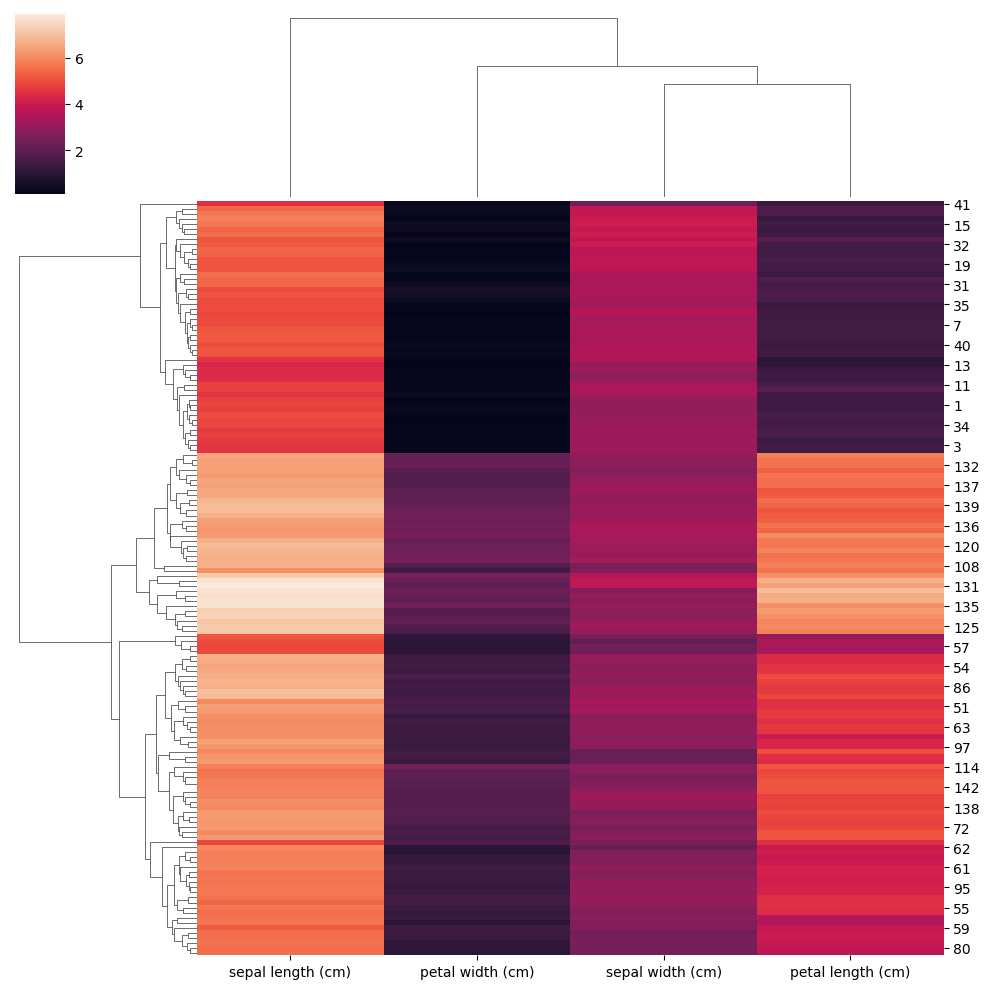

In [16]:
import seaborn as sns
sns.clustermap(df_subset)
plt.show()

### Hopefully this HandBook helps someone
: Kaustubh M
ins